In [285]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
import os
import array


import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.time import Time
from scipy import signal
from numpy.random import random_sample

In [2]:
def size2n(array, direction='up'):
    if direction not in ['up', 'down']:
        raise ValueError( '"{}"'.format(direction)
                         + ' is not possible argument for the function. Use "up" or "down"')
    elif len(array) == 0:
        raise ValueError("The array cannot be empty. len(array) = 0")
    else:
        pass
    
    obs_points = len(array)
    if obs_points & (obs_points - 1):
        x = bin(obs_points)
        if direction == 'up':
            x_high = '0b1' + '0'*(len(x[2:]))
            add_points = int(x_high, 2) - obs_points
            return np.hstack([array, np.zeros(add_points)])
        else:
            x_low = '0b1' + '0'*(len(x[3:]))
            add_points = obs_points - int(x_low, 2)
            return array[:-add_points]
    else:
        return array

0.7692307692307692


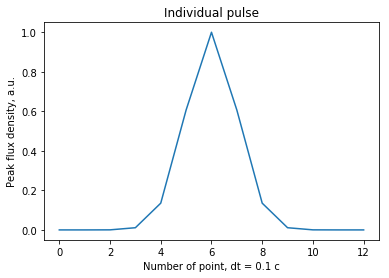

In [3]:
period_s = 1.3 # Период исскуственного пульсара
demen = 10e0
pulse = signal.gaussian(period_s*demen, std=1, sym=True)
plt.close()
plt.title('Individual pulse')
plt.ylabel('Peak flux density, a.u.')
plt.xlabel('Number of point, dt = ' + str(1/demen) + ' c')
plt.plot(pulse)
print(1/period_s)

In [4]:
ampl_noise = 0.1
len_noise_left = 1
len_noise_right = 1
idx = 1
obser = []
for i in range(10):
    obser.append([])
    for j in range(200):
        obser[i].extend(random_sample(1)*pulse + np.random.normal(0, ampl_noise, len(pulse)))

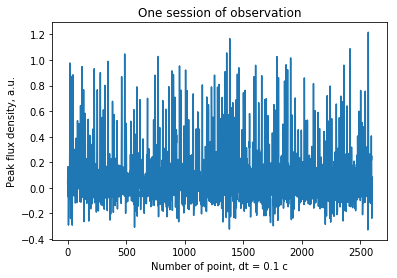

In [5]:
plt.close()
plt.plot(obser[idx])
plt.title('One session of observation')
plt.ylabel('Peak flux density, a.u.')
plt.xlabel('Number of point, dt = ' + str(1/demen) + ' c')
plt.show()

In [301]:
# Звездные сутки 86164,090530833 с или 861641 точек между двумя точками в звездных сутками
# Размер массива точек 861641 - 200 = 861441

In [6]:
joined_array_zero = np.hstack([obser[0], np.zeros(861441), 
                               obser[1], np.zeros(861441),
                               obser[2], np.zeros(861441),
                               obser[3], np.zeros(861441),
                               obser[4], np.zeros(861441),
                              ])
#joined_array_full = np.hstack([i for i in obser[:3]])

In [7]:
print(len(joined_array_zero))

4320205


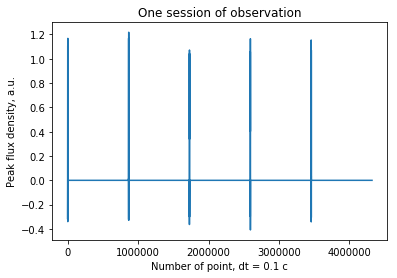

In [8]:
plt.close()
plt.plot(joined_array_zero)
plt.title('One session of observation')
plt.ylabel('Peak flux density, a.u.')
plt.xlabel('Number of point, dt = ' + str(1/demen) + ' c')
plt.show()

In [61]:
fs = demen # частотота дискретизации временных рядов 
noised_obser = size2n(joined_array_zero, 'up')
f, Pxx_den = signal.periodogram(noised_obser[:-20], fs)

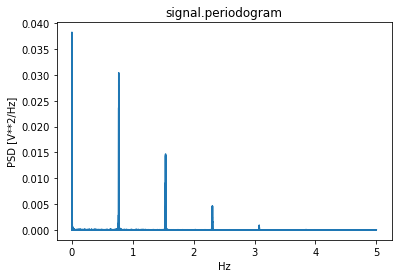

In [62]:
plt.plot(f, Pxx_den)
plt.title('signal.periodogram')
plt.ylabel('PSD [V**2/Hz]')
plt.xlabel('Hz')
# plt.axhline(0.3*max(Pxx_den))
# plt.ylim(0, 0.00003)
# plt.xlim(0.8, 0.87)
plt.show()

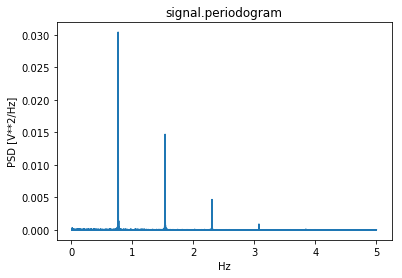

In [63]:
tres = 10000
plt.plot(f[tres:],Pxx_den[tres:])
plt.title('signal.periodogram')
plt.ylabel('PSD [V**2/Hz]')
plt.xlabel('Hz')
# plt.axhline(0.3*max(Pxx_den))
# plt.ylim(0, 0.00003)
#plt.xlim(0.8, 0.87)
plt.show()

In [64]:
f_tresed = f[tres:]
Pxx_den_tresed = Pxx_den[tres:]

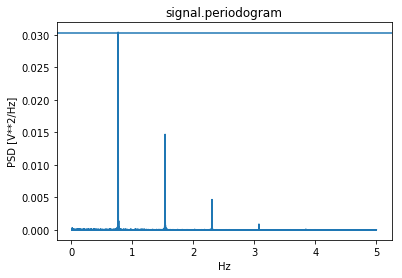

In [65]:
plt.plot(f_tresed,Pxx_den_tresed)
plt.title('signal.periodogram')
plt.ylabel('PSD [V**2/Hz]')
plt.xlabel('Hz')
plt.axhline(0.996*max(Pxx_den_tresed))
#plt.axvline(0.8333361148834229, color='r')
#plt.xlim(0.825, 0.84)
plt.show()

In [66]:
peaks_origin, _ = signal.find_peaks(Pxx_den_tresed, height=0.99*max(Pxx_den_tresed))
true_harm = 1/period_s
main_harm = f_tresed[peaks_origin][0]
for i in f_tresed[peaks_origin][:]:
    print(i, i/main_harm, i/true_harm)

0.769072220497657 1.0 0.9997938866469542
0.7691532830078197 1.0001054029881749 0.9998992679101657
0.7692343455179823 1.0002108059763495 1.0000046491733772
0.7693154080281449 1.0003162089645243 1.0001100304365884
0.7693499788045378 1.0003611602388929 1.0001549724458993
0.7694310413147004 1.0004665632270675 1.0002603537091106


In [67]:
len(noised_obser[:-20])/period_s

6452760.0